<a href="https://colab.research.google.com/github/ShrimanthAM/DeepLearningClass/blob/master/DATA690Fall2020_HW2ShrimanthAjjamaneManohar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework, Due the 28th of September 

1. The input range of data can have a large impact on a neural network. This applies to inputs _and_ outputs, like for regression problems. Try applying  Scikit-learn's `StandardScaler` to the targets $\boldsymbol{y}$ of the toy regression problem at the start of this chapter, and train a new neural network on it. Does changing the scale of the outputs help or hurt the model's predictions?
1. The AUC metric does not follow the standard pattern in scikit-learn, as it requires `y_pred` to be a vector of shape $(N)$ instead of a matrix of shape $(N, 2)$. Write a wrapper function for AUC that will make it compatible with our `train_simple_network` function. 
1. Write a new function `resume_simple_network`, which loads a `checkpoint_file` from disk, restores both the `optimizer` and `model` state, and continues training to a specified total number of epochs. So if the model was saved after 20 epochs, and you specify 30 epochs, it should only perform 10 more epochs of training. 
1. The "deep" part of deep learning refers to the number of layers in a neural network. Try adding more layers (up to 20) to the models we used for the `make_moons` classification problem. How do more layers impact the performance?
1. Try changing the number of neurons used in the hidden layers of the `make_moons` classification problem. How does it impact performance?
1. Use scikit-learn to load the breast cancer wisconsin dataset, and convert it into a `TensorDataset` and then split it into 80% for training and 20% for testing. Try to build your own classification neural network for this data. 


In [ ]:
from tqdm.autonotebook import tqdm

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

import time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import * 

from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/MPDL Fall 2020/')

from mpdl import *

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

torch.backends.cudnn.deterministic=True
set_seed(42)

# Q1.
The input range of data can have a large impact on a neural network. This applies to inputs _and_ outputs, like for regression problems. Try applying  Scikit-learn's `StandardScaler` to the targets $\boldsymbol{y}$ of the toy regression problem at the start of this chapter, and train a new neural network on it. Does changing the scale of the outputs help or hurt the model's predictions?

In [ ]:
#Crate a 1-dimensional input
X = np.linspace(0, 20, num=200)
#create an output
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)
print(y)
y1=y.reshape(1,-1)
print(y1)
#sns.scatterplot(x=X, y=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X1=X.reshape(1,-1)

In [ ]:
X1.shape

(1, 200)

In [ ]:
y1.shape

(1, 200)

In [ ]:
y2=scaler.fit_transform(y1)

In [ ]:
print(y2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
X2=scaler.fit_transform(X1)

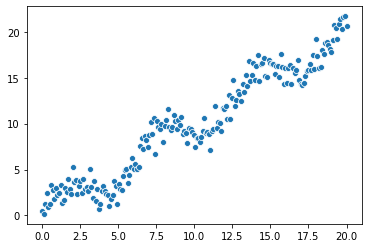

In [ ]:
sns.scatterplot(x=X, y=y)

In [ ]:
class Simple1DRegressionDataset(Dataset):
        
    def __init__(self, X, y2):
        super(Simple1DRegressionDataset, self).__init__()
        self.X = X.reshape(-1,1)
        self.y2 = y2.reshape(-1,1)
        
    
    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y2[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]
    
training_loader = DataLoader(Simple1DRegressionDataset(X2, y2), shuffle=True)

In [ ]:
training_loader = DataLoader(Simple1DRegressionDataset(X2, y2), shuffle=True)


In [ ]:
training_loader

In [ ]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    #Yellow step is done here. We create the optimizer and move the model to the compute device
    #SGD is Stochastic Gradient Decent over the parameters $\Theta$
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    #The next two for loops handle the Red steps, iterating through all the data (batches) multiple times (epochs)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            #Move the batch of data to the device we are using. this is the last red step
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)

            #First a yellow step, prepare the optimizer. Most PyTorch code will do this first to make sure everything is in a clean and ready state. 

            #PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #The next two lines of code perform the two blue steps
            y_hat = model(inputs) #this just computed $f_\theta(\boldsymbol{x_i})$

            # Compute loss.
            loss = loss_func(y_hat, labels)

            #Now the remaining two yellow steps, compute the gradient and ".step()" the optimizer!
            loss.backward()# $\nabla_\Theta$ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# $\Theta_{k+1} = \Theta_k − \eta \cdot \nabla_\Theta \ell(\hat{y}, y)$

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item()

In [ ]:
in_features = 1
out_features = 1
model = nn.Linear(in_features, out_features)
loss_func = nn.MSELoss()

device = torch.device("cuda")
train_simple_network(model, loss_func, training_loader, device=device)

In [ ]:
print("Is CUDA available? :", torch.cuda.is_available())

Is CUDA available? : True


In [ ]:
with torch.no_grad():
    Y_pred = model(torch.tensor(X2.reshape(-1,1), device=device, dtype=torch.float32)).cpu().numpy()

In [ ]:
Y_pred.shape

(200, 1)

In [ ]:
Y_pred.ravel()

array([0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027621,
       0.00027621, 0.00027621, 0.00027621, 0.00027621, 0.00027

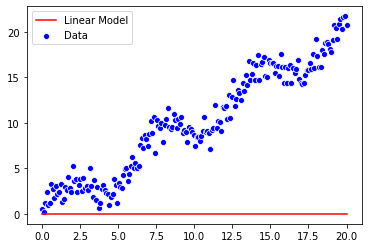

In [ ]:
sns.scatterplot(x=X, y=y, color='blue', label='Data') #The data
sns.lineplot(x=X, y=Y_pred.ravel(), color='red', label='Linear Model') #What our model learned

# Q2
2. The AUC metric does not follow the standard pattern in scikit-learn, as it requires `y_pred` to be a vector of shape $(N)$ instead of a matrix of shape $(N, 2)$. Write a wrapper function for AUC that will make it compatible with our `train_simple_network` function. 


In [ ]:
import numpy as np
from sklearn import metrics
#>>> y = np.array([1, 1, 2, 2])
#>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
#fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
#metrics.auc(fpr, tpr)


In [ ]:
metrics.auc(X,Y_pred.ravel())

0.0055242987582460054

In [ ]:
def train_simple_network(model, loss_func, training_loader, epochs=20, device="cpu"):
    #Yellow step is done here. We create the optimizer and move the model to the compute device
    #SGD is Stochastic Gradient Decent over the parameters $\Theta$
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    #The next two for loops handle the Red steps, iterating through all the data (batches) multiple times (epochs)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0

        for inputs, labels in tqdm(training_loader, desc="Batch", leave=False):
            #Move the batch of data to the device we are using. this is the last red step
            inputs = moveTo(inputs, device)
            labels = moveTo(labels, device)

            #First a yellow step, prepare the optimizer. Most PyTorch code will do this first to make sure everything is in a clean and ready state. 

            #PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            #The next two lines of code perform the two blue steps
            y_hat = model(inputs) #this just computed $f_\theta(\boldsymbol{x_i})$

            # Compute loss.
            loss = loss_func(y_hat, labels)

            #Now the remaining two yellow steps, compute the gradient and ".step()" the optimizer!
            loss.backward()# $\nabla_\Theta$ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# $\Theta_{k+1} = \Theta_k − \eta \cdot \nabla_\Theta \ell(\hat{y}, y)$

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item()

# Q3

Write a new function `resume_simple_network`, which loads a `checkpoint_file` from disk, restores both the `optimizer` and `model` state, and continues training to a specified total number of epochs. So if the model was saved after 20 epochs, and you specify 30 epochs, it should only perform 10 more epochs of training.

In [ ]:
def resume_simple_network():
  

# Q4
The "deep" part of deep learning refers to the number of layers in a neural network. Try adding more layers (up to 20) to the models we used for the `make_moons` classification problem. How do more layers impact the performance?

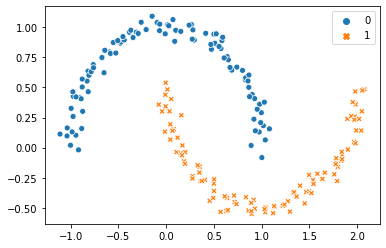

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)

In [ ]:
classification_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
                                                        torch.tensor(y, dtype=torch.long))
training_loader = DataLoader(classification_dataset)

In [ ]:
in_features = 2
out_features = 2
model = nn.Linear(in_features, out_features)

In [ ]:
loss_func = nn.CrossEntropyLoss()
train_simple_network(model, loss_func, training_loader, epochs=50)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
train_simple_network(model, loss_func, training_loader, epochs=250)

In [ ]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij')
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    with torch.no_grad():
        logits = model(torch.tensor(xy_v, dtype=torch.float32))
        y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(xv, yv, y_hat[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=cs.ax)
    if title is not None:
        cs.ax.set_title(title)

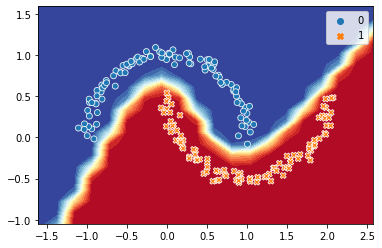

In [ ]:
visualize2DSoftmax(X, y, model)

# Q5
 Try changing the number of neurons used in the hidden layers of the `make_moons` classification problem. How does it impact performance?

In [ ]:
model = nn.Sequential(
    nn.Linear(2,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50, 2),
)
train_simple_network(model, loss_func, training_loader, epochs=250)

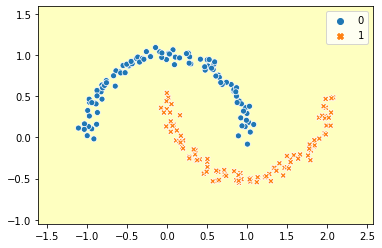

In [ ]:
visualize2DSoftmax(X, y, model)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,  50),
    nn.Tanh(),
    nn.Linear(50,  50),
    nn.Tanh(),
    nn.Linear(50, 2),
)
train_simple_network(model, loss_func, training_loader, epochs=250)

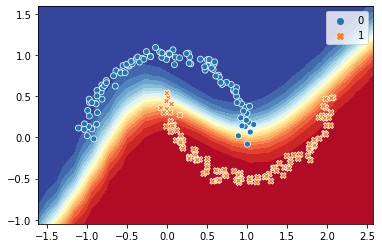

In [ ]:
visualize2DSoftmax(X, y, model)

# Q6
Use scikit-learn to load the breast cancer wisconsin dataset, and convert it into a `TensorDataset` and then split it into 80% for training and 20% for testing. Try to build your own classification neural network for this data.

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

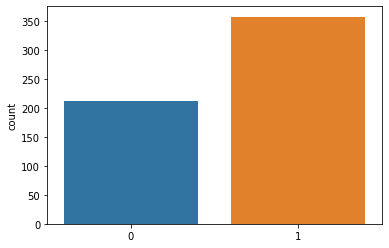

In [ ]:
sns.countplot(data.target)

In [ ]:
classification_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32),
                                                        torch.tensor(y_train, dtype= torch.long))
training_loader = DataLoader(classification_dataset)

In [ ]:
in_features = 30
out_features = 2
model = nn.Linear(in_features, out_features)

In [ ]:
loss_func = nn.CrossEntropyLoss()
train_simple_network(model, loss_func, training_loader, epochs=50)

In [ ]:
def visualize2DSoftmax(X, y, model, title=None):
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij')
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    with torch.no_grad():
        logits = model(torch.tensor(xy_v, dtype=torch.float32))
        y_hat = F.softmax(logits, dim=1).numpy()

    cs = plt.contourf(xv, yv, y_hat[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=cs.ax)
    if title is not None:
        cs.ax.set_title(title)

In [ ]:
with torch.no_grad():
  logits = model(torch.tensor(X_test, dtype=torch.float32))
  y_hat = F.softmax(logits, dim=1).numpy()

In [ ]:
d

{'B': 1, 'M': 0}

In [ ]:
X_test.shape

(114, 30)

In [ ]:
y_hat.shape

(114, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Python
# Split dataset into training (80%) and test (20%) set
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)


In [ ]:

# Normalize data
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_train.mean())/(X_test.max()-X_test.min())
1
2
3
4
5
6
# Split dataset into training (80%) and test (20%) set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 